In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz

import os
os.environ["PATH"]+= os.pathsep + 'C:\Program Files (x86)\graphviz-2.38\bin'

%matplotlib inline

In [2]:
wine=pd.read_excel("Wine(2).xls")
wine.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Type                    178 non-null object
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcalinity          178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280_OD315             178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 19.5+ KB


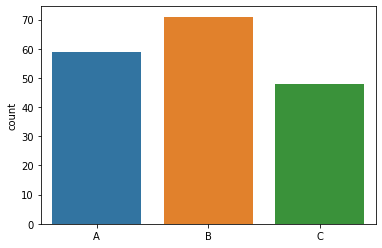

In [4]:
sns.countplot(wine["Type"].values)
plt.show()

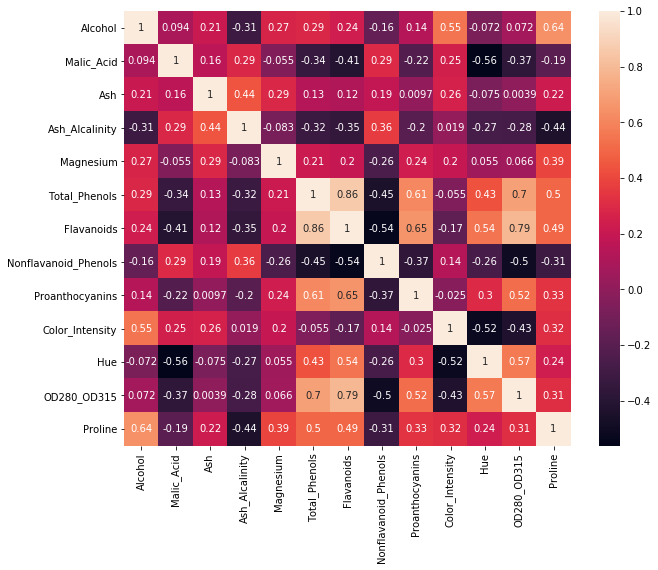

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(), annot=True)
plt.show()

In [6]:
wine.columns

Index(['Type', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline'],
      dtype='object')

In [7]:
# sns.pairplot(wine[['Type', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium',
#        'Total_Phenols','Flavanoids']], hue="Type")
# plt.show()

In [8]:
# sns.pairplot(wine[['Type', 'Nonflavanoid_Phenols',
#        'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline']], hue="Type")
# plt.show()

In [9]:
X=wine.drop("Type", axis=1)
y=wine["Type"]

In [10]:
clf_dt = DecisionTreeClassifier(random_state=1011).fit(X, y)
scores = cross_val_score(clf_dt, X, y, cv=10)
scores.mean()

0.8949948400412797

In [11]:
clf_dt.classes_

array(['A', 'B', 'C'], dtype=object)

In [12]:
dot_data = export_graphviz(clf_dt, out_file=None,
                                feature_names=X.columns,
                                class_names=clf_dt.classes_,
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
# graph.render("iaa",format="png") 

In [13]:
clf_rf = RandomForestClassifier(random_state=1011).fit(X, y)
scores = cross_val_score(clf_rf, X, y, cv=10)
scores.mean()

C:\Users\TAEHYEONG\Anaconda3\envs\DACON\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9614035087719298

In [14]:
clf_rf.feature_importances_

array([0.19204852, 0.0218412 , 0.01889602, 0.02489779, 0.00794649,
       0.03023929, 0.04700756, 0.03442103, 0.034835  , 0.2227357 ,
       0.07283979, 0.13174918, 0.16054243])

In [15]:
X.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline'],
      dtype='object')

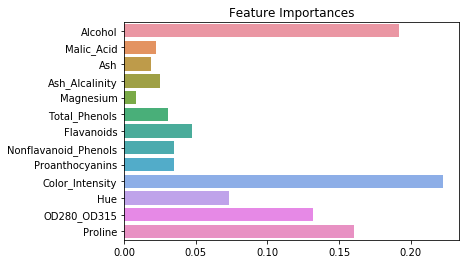

In [16]:
plt.title("Feature Importances")
sns.barplot(clf_rf.feature_importances_, X.columns)
plt.show()

In [17]:
parameters = {'criterion':('gini', 'entropy'), 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10] }

In [18]:
clf = GridSearchCV(clf_dt, parameters).fit(X, y)

C:\Users\TAEHYEONG\Anaconda3\envs\DACON\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\TAEHYEONG\Anaconda3\envs\DACON\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
df=pd.DataFrame(clf.cv_results_)
df=df[["param_criterion", "param_min_samples_split", "params", "mean_test_score"]]
df

,param_criterion,param_min_samples_split,params,mean_test_score
0,gini,2,"{'criterion': 'gini', 'min_samples_split': 2}",0.848315
1,gini,3,"{'criterion': 'gini', 'min_samples_split': 3}",0.848315
2,gini,4,"{'criterion': 'gini', 'min_samples_split': 4}",0.848315
3,gini,5,"{'criterion': 'gini', 'min_samples_split': 5}",0.848315
4,gini,6,"{'criterion': 'gini', 'min_samples_split': 6}",0.848315
5,gini,7,"{'criterion': 'gini', 'min_samples_split': 7}",0.848315
6,gini,8,"{'criterion': 'gini', 'min_samples_split': 8}",0.848315
7,gini,9,"{'criterion': 'gini', 'min_samples_split': 9}",0.848315
8,gini,10,"{'criterion': 'gini', 'min_samples_split': 10}",0.848315
9,entropy,2,"{'criterion': 'entropy', 'min_samples_split': 2}",0.876404


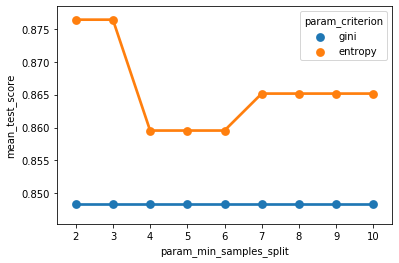

In [20]:
sns.pointplot(data=df, x="param_min_samples_split", y="mean_test_score", hue="param_criterion")
plt.show()

In [21]:
clf.best_params_

{'criterion': 'entropy', 'min_samples_split': 2}

In [22]:
clf.best_score_

0.8764044943820225

In [23]:
parameters = {'criterion':('gini', 'entropy'), 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], }

In [24]:
clf = GridSearchCV(clf_rf, parameters).fit(X, y)

C:\Users\TAEHYEONG\Anaconda3\envs\DACON\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\TAEHYEONG\Anaconda3\envs\DACON\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
df=pd.DataFrame(clf.cv_results_)
df=df[["param_criterion", "param_min_samples_split", "params", "mean_test_score"]]
df

,param_criterion,param_min_samples_split,params,mean_test_score
0,gini,2,"{'criterion': 'gini', 'min_samples_split': 2}",0.926966
1,gini,3,"{'criterion': 'gini', 'min_samples_split': 3}",0.938202
2,gini,4,"{'criterion': 'gini', 'min_samples_split': 4}",0.932584
3,gini,5,"{'criterion': 'gini', 'min_samples_split': 5}",0.926966
4,gini,6,"{'criterion': 'gini', 'min_samples_split': 6}",0.932584
5,gini,7,"{'criterion': 'gini', 'min_samples_split': 7}",0.926966
6,gini,8,"{'criterion': 'gini', 'min_samples_split': 8}",0.932584
7,gini,9,"{'criterion': 'gini', 'min_samples_split': 9}",0.932584
8,gini,10,"{'criterion': 'gini', 'min_samples_split': 10}",0.932584
9,entropy,2,"{'criterion': 'entropy', 'min_samples_split': 2}",0.926966


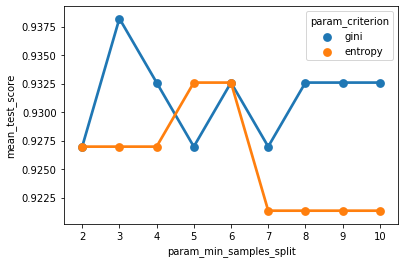

In [26]:
sns.pointplot(data=df, x="param_min_samples_split", y="mean_test_score", hue="param_criterion")
plt.show()

In [27]:
clf.best_params_

{'criterion': 'gini', 'min_samples_split': 3}

In [28]:
clf.best_score_

0.9382022471910112